# <center> Otto Group Product Classification Challenge </center>

El Grupo Otto es una de las mayores empresas de comercio electrónico del mundo, con filiales en más de 20 países, como Crate & Barrel (EE.UU.), Otto.de (Alemania) y 3 Suisses (Francia). Cada día vendemos millones de productos en todo el mundo, a los que se suman varios miles de productos.

Un análisis coherente del rendimiento de nuestros productos es crucial. Sin embargo, debido a nuestra diversa infraestructura mundial, muchos productos idénticos se clasifican de forma diferente. Por lo tanto, la calidad de nuestro análisis de productos depende en gran medida de la capacidad de agrupar con precisión productos similares. Cuanto mejor sea la clasificación, más información podremos generar sobre nuestra gama de productos.

Participantes:

Julian David Ruiz Herrera

Juan Felipe Usuga Villegas

Jonatan Urrego Zea

Johan Sebastian Cano Garcia

Raul vladimir Gaitan Vaca


Nota: La cuenta de wispetzar20 le pertenece a Julian

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# Para leer desde kaggle 
#train = pd.read_csv("/kaggle/input/otto-group-product-classification-challenge/train.csv")

# Linea para leer desde colab
train = pd.read_csv("/content/train.csv")
#se carga la base de entrenamiento

#para poder ver todas las columnas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [7]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [9]:
train['target'].unique()

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

Podemos observar que se tienen 9 clases y 93 caracteristicas que permiten definir cada una de las clases. 

Dada la gran cantidad de variables es necesario analizar si todas estas variables son significativas o algunas de ellas se pueden descartar.

Nota:no se puede trabajar con la medida de correlacion de pearson dado que son datos categoricos. 

## Chi-square

Para asegurarnos que todas las variables sean significativas tambien se hara la prueba de **Chi-square**

In [11]:
# Se separan las columnas con caracteristicas de la variable objetivo
X = train[train.columns.drop(['id','target'])]
y = train['target']
X.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [12]:
y.value_counts()
# se ven datos un poco desbalanceados lo que podria indicar que hay un error al hacer el muestreo.
# para solucionar esto se podria hacer un oversampling sobre cada categoria para obtener un dataset más diversificado.
# (no lo supe hacer)

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [13]:
from scipy.stats import chi2_contingency

# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y, X[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result


,Feature,p-value
0,feat_1,0.0
1,feat_67,0.0
2,feat_66,0.0
3,feat_65,0.0
4,feat_64,0.0
5,feat_63,0.0
6,feat_62,0.0
7,feat_61,0.0
8,feat_60,0.0
9,feat_59,0.0


In [14]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values

# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X, y)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,feat_34,14021.363694,0.0
1,feat_11,4267.316230,0.0
2,feat_60,2300.267554,0.0
3,feat_14,2058.729955,0.0
4,feat_25,1918.877608,0.0
5,feat_3,1917.954717,0.0
6,feat_54,1783.035250,0.0
7,feat_26,1765.161166,0.0
8,feat_36,1692.507040,0.0
9,feat_62,1653.641903,0.0


Todas las variables son importantes para modelar la variable respuesta por el valor p tan pequeño y por lo tanto no se descarta ninguna variable para el entrenamiento.

## Entrenamiento con lightgbm

El GBM ligero es una estructura rápida, apropiada y impulso de gradiente, que depende del cálculo del árbol de elección, y que se utiliza para el posicionamiento, la caracterización y otras numerosas asignaciones de la IA.

Dado que depende de los cálculos del árbol, divide la hoja del árbol con el mejor ajuste, mientras que otros cálculos de impulso dividen la profundidad del árbol de manera astuta o nivelada en oposición a la hoja. Así que cuando se desarrolla en una hoja similar en Light GBM, el cálculo por hojas puede disminuir más desgracias que el cálculo por niveles y, por lo tanto, produce una precisión mucho mayor que puede ser lograda de vez en cuando por cualquiera de los cálculos de impulso actuales.

In [15]:
#https://datascience.eu/es/aprendizaje-automatico/que-es-light-gbm/ 
#poner algo de que es esto
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf = clf.fit(X, y)
                    

In [16]:
# Lectura datos de prueba desde kaggle
#test = pd.read_csv('/kaggle/input/otto-group-product-classification-challenge/test.csv')

# Lectura desde colab
test = pd.read_csv('/content/test.csv')

test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,0,0,0,0,2,0,4,0,4,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,0,0,1,0,1,0,4,0,2,3,0,0,0,0,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0


In [17]:
# Se hace la prediccion de los datos de prueba
pred = clf.predict(test[test.columns.drop(['id'])])

In [18]:
# Se juntan  de nuevo el id de los datos con su prediccion 
submission = pd.DataFrame({'id':test['id'],'':pred})

submission=submission.reset_index(drop=True)

submission=pd.get_dummies(submission,prefix=None)

submission.columns=submission.columns.str.lstrip("_")

In [19]:
submission.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0,0,0,1,0,0,0,0,0
1,2,0,0,0,0,0,1,0,0,0
2,3,0,0,0,0,0,1,0,0,0
3,4,0,1,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,1


In [20]:
submission.to_csv('submission.csv',index=False)

Nota: Se podria tener un modelo mucho mejor si se entrenara con una muestra balanceada

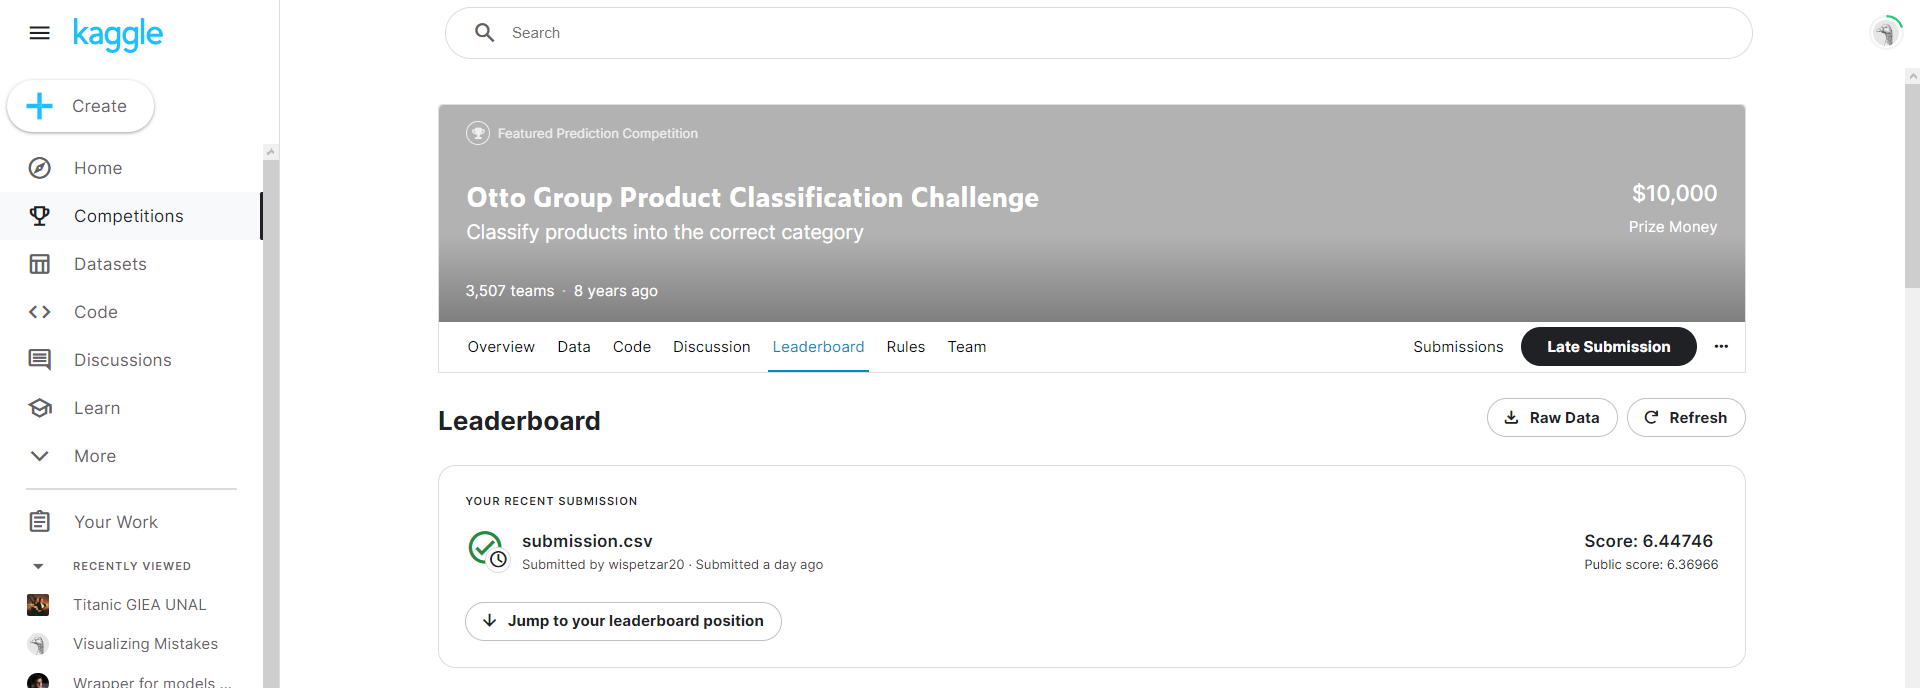